
## For the theory behind this algorithm, see Chapter 4 in the textbook Intro to Statistical Learning by James et al.

We start by adding the import statements for libraries we'll need.

Note that this is using logistic gradient descent since we're doing classification.

Also note that we took the logarithm of the TFF1 variable for the calculations, so that needs to be accounted for and checked for validity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.model_selection
import pandas as pd

Mounted at /content/drive


In [ ]:
def load_data(filepath): # input argument is a string of the filepath
    data = pd.read_csv(filepath) # pandas function for reading in the csv into a nice dataframe

    # We'll use the matrix equation X b = Y. X contains the data/'coefficients'
    # Y contains the labels of classification
    diagnosis = pd.get_dummies(data['diagnosis']) #This is our Y vals
    data = data.drop('diagnosis', axis=1) #we want to separate it from X

    id = data['sample_id']
    data = data.drop('sample_id', axis=1)
    #we may want to rethink if we should drop all of these. It might be easiest
    #eventually to use the sample id for the accuracy check
    data = data.drop('sample_origin', axis=1)
    sex = pd.get_dummies(data['sex']) # need to make this column of M F into binary
    data['sex'] = sex['F'] # female are 1, male are 0
    data = data.drop('patient_cohort', axis=1)
    data = data.drop('benign_sample_diagnosis', axis=1)
    data = data.drop('plasma_CA19_9', axis=1)
    data = data.drop('REG1A', axis=1)
    data = data.drop('stage', axis = 1) #I don't think we care about the things that are dropped here
    data['TFF1'] = np.log(data['TFF1'])
    X = data.values
    Y = diagnosis.values
    numExamples = X.shape[0]
    allOnes = np.ones((numExamples, 1))
    X = np.concatenate((X, allOnes), axis=1)
    # Since this function is general enough to be used for any ML algorithm, we
    # append a column of 1s onto the end of X to be the coefficients for any constant terms
    # i.e., in least squares, we need a column of 1s

    return (X, Y)

In [ ]:
# Evaluate the optimization problem at this point
def evalF(beta, X, Y):
    numEx, numFeat = X.shape
    numEx, numClass = Y.shape
    dots = np.matmul(X, beta)
    dots = np.array(dots, dtype = np.float128)
    numers = np.exp(dots)
    denoms = np.sum(numers, axis = 1)
    denoms = np.reshape(denoms, (numEx, 1))
    denoms = np.tile(denoms, (1, numClass))
    p = numers/denoms
    logp = np.log(p)
    Ylogp = Y*logp
    return -np.sum(Ylogp)

In [ ]:
# calculate the gradient at this point
def evalGrad(beta, X, Y):
    numEx, numFeat = X.shape
    numEx, numClass = Y.shape
    dots = np.matmul(X, beta)
    numers = np.exp(dots)
    denoms = np.sum(numers, axis = 1)
    denoms = np.reshape(denoms, (numEx, 1))
    denoms = np.tile(denoms, (1, numClass))
    p = numers/denoms
    grad = np.matmul(X.T, (p-Y))
    return grad

In [ ]:
# Main function
def multilogReg(t, X, Y):
    numEx, numFeat = X.shape
    numEx, numClass = Y.shape
    maxIter = 50000
    showTrigger = 10000
    costs = np.zeros(maxIter+1)
    beta=np.zeros((numFeat, numClass))
    for i in range(maxIter+1):
        grad = evalGrad(beta, X, Y)
        beta = beta - t * grad
        cost = evalF(beta, X, Y)
        costs[i] = cost
        if i % showTrigger == 0:
            print("Iteration ", i, "; Cost: ", cost)

    return (beta, costs)

In [ ]:
# Driver part of the code
X, Y = load_data('Debernardi_et_al_2020_data.csv')

X_test, X_train, Y_test, Y_train = sk.model_selection.train_test_split(X, Y, test_size = 0.5)

beta, costs = multilogReg(0.0000001, X_train, Y_train)
yhat = np.matmul(X_test, beta)

Iteration  0 ; Cost:  310.08142313730568768
Iteration  10000 ; Cost:  272.2904836932410737
Iteration  20000 ; Cost:  266.41543043056432077
Iteration  30000 ; Cost:  263.83691892727492165
Iteration  40000 ; Cost:  262.320935745505091
Iteration  50000 ; Cost:  261.2667048107695173


Fraction Classified Incorrectly:  0.4576271186440678  Fraction Classified Correctly:  0.5423728813559322


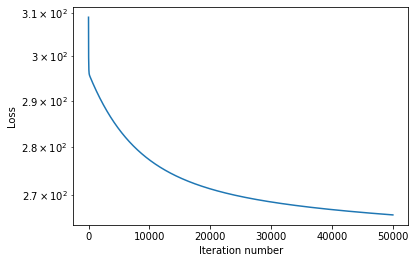

In [ ]:
# Calculate the accuracy of our classification

truth = np.argmax(Y_test,axis = 1)
Predictions = np.argmax(yhat, axis = 1)
wrong = np.where(Predictions != truth)[0]
k = float(len(wrong))
tot = len(Y_test)
fracWrong = k/tot
fracRight = 1 - fracWrong

print("Fraction Classified Incorrectly: ", fracWrong, \
      " Fraction Classified Correctly: ", fracRight )
n=len(costs)
idx = np.zeros(n)
idx = [(i + 1) for i in range(n)]
plt.figure()
plt.semilogy(idx, costs)
plt.xlabel('Iteration number')
plt.ylabel('Loss')
plt.show()